mu: 0.0032301729706304084
mse: 0.007028729983026651


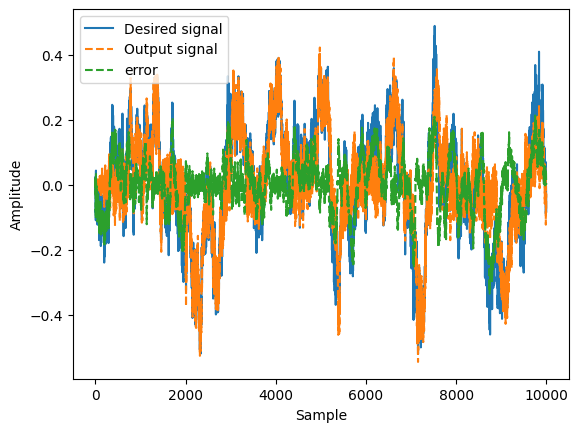

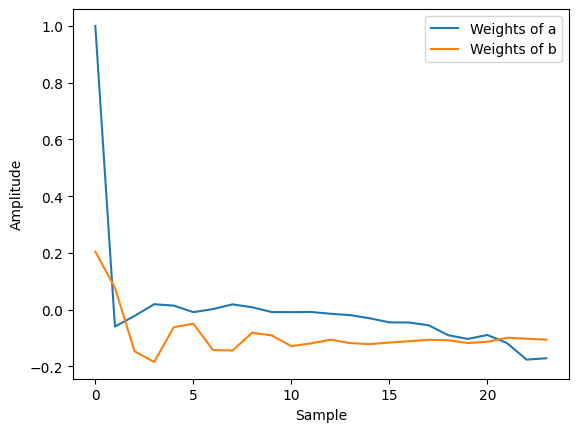

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import freqz, welch
from Signal_proctools import *
# Example usage:
processor = SignalProcessor(96000)

# Read the WAV file
fs, data = wavfile.read("test_IR-96k.wav")

# Plot the impulse response
# Find the index of the maximum value in the array
max_index = np.argmax(data)
ir=data[max_index:max_index+256]
ir = (ir - np.min(ir)) / (np.max(ir) - np.min(ir)) * 2 - 1
ir *=0.2

length=10000
t, reference_sig = processor.generate_noise_signal(length, 0.1)
t, noise = processor.generate_noise_signal(length, 0.01)
d = np.convolve(reference_sig + noise, ir)[:length] #"Desired signal"

# Example parmaters setup:
N = 24
mu = 0.48
y, err, a,b = processor.lms_IIR_filter(reference_sig, d, N, mu)

mse=processor.custom_mse(d, y)
print("mse:",mse)

#Plot the results
plt.plot(d, label="Desired signal")
plt.plot(y,'--', label="Output signal")
plt.plot(err,'--',  label="error")
# Add labels and title
plt.xlabel("Sample")
plt.ylabel("Amplitude")
# Add legend
plt.legend()
# Show the plot
plt.show()


#Plot the results of determined IR weights
plt.plot(a, label="Weights of a")
plt.plot(b, label="Weights of b")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
# Show the plot
plt.show()


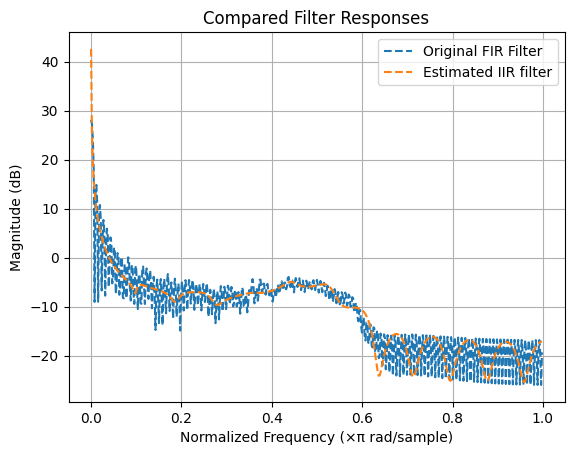

In [16]:
# Frequency response of the optimized IIR filter
freq, response_ = freqz(ir, 1)

# Plotting the responses
plt.plot(freq / np.pi, 20 * np.log10(abs(response_)), label='Original FIR Filter', linestyle='--')

freq, response_ = freqz(b,a)

# Plotting the responses
plt.plot(freq / np.pi, 20 * np.log10(abs(response_)), label='Estimated IIR filter', linestyle='--')
plt.title('Compared Filter Responses')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)
plt.show()
